<a href="https://colab.research.google.com/github/Dibyaroy25/PUBG-Data-Analysis-and-Prediction/blob/main/pubg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings("ignore")

In [4]:
data=pd.read_csv("/content/drive/MyDrive/pubg-finish-placement-prediction/train_V2.csv")

In [5]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024**2
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                #if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                #    df[col] = df[col].astype(np.float16)
                #el
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        #else:
            #df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB --> {:.2f} MB (Decreased by {:.1f}%)'.format(
        start_mem, end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df


In [6]:
data=reduce_mem_usage(data)

Memory usage of dataframe is 983.90 MB --> 339.28 MB (Decreased by 65.5%)


In [7]:
pd.set_option('float_format', '{:2f}'.format)

In [8]:
pd.options.display.float_format = "{:,.2f}".format

#Data Info

---

---





In [9]:
data.shape

(4446966, 29)

###44446966 rows and 29 cols

In [10]:
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.00,0,0.00,0,0,244.80,1,1466,0.44
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.00,0,11.04,0,0,"1,434.00",5,0,0.64
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.00,0,0.00,0,0,161.80,2,0,0.78
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.00,0,0.00,0,0,202.70,3,0,0.17
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.00,0,0.00,0,0,49.75,2,0,0.19


###First 5  rows.

In [11]:
data.dtypes

Id                  object
groupId             object
matchId             object
assists               int8
boosts                int8
damageDealt        float32
DBNOs                 int8
headshotKills         int8
heals                 int8
killPlace             int8
killPoints           int16
kills                 int8
killStreaks           int8
longestKill        float32
matchDuration        int16
matchType           object
maxPlace              int8
numGroups             int8
rankPoints           int16
revives               int8
rideDistance       float32
roadKills             int8
swimDistance       float32
teamKills             int8
vehicleDestroys       int8
walkDistance       float32
weaponsAcquired      int16
winPoints            int16
winPlacePerc       float32
dtype: object

##Four Categorical column rest numerical.

In [12]:
data.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

###One null col(dependant col) with one null value.

In [13]:
data.nunique()

Id                 4446966
groupId            2026745
matchId              47965
assists                 20
boosts                  27
damageDealt          29916
DBNOs                   39
headshotKills           34
heals                   63
killPlace              101
killPoints            1707
kills                   58
killStreaks             18
longestKill          28284
matchDuration         1267
matchType               16
maxPlace               100
numGroups              100
rankPoints            2262
revives                 25
rideDistance         33562
roadKills               14
swimDistance         28345
teamKills               11
vehicleDestroys          6
walkDistance         38599
weaponsAcquired         97
winPoints             1447
winPlacePerc          3000
dtype: int64

###Columns with their resp. no. of unique values.

#Duplicated Rows

---

---







In [14]:
data[data.duplicated()].shape

(0, 29)

###There are 595 duplicated rows, lets remove them.

In [15]:
data.drop(data[data.duplicated()].index,inplace = True)

#"numGroups" , "maxPlace"

---

---





In [16]:
data[["numGroups","maxPlace"]].describe()

,numGroups,maxPlace
count,"4,446,966.00","4,446,966.00"
mean,43.01,44.50
std,23.29,23.83
min,1.00,1.00
25%,27.00,28.00
50%,30.00,30.00
75%,47.00,49.00
max,100.00,100.00


In [17]:
data[["numGroups","maxPlace"]].corr()

,numGroups,maxPlace
numGroups,1.00,1.00
maxPlace,1.00,1.00


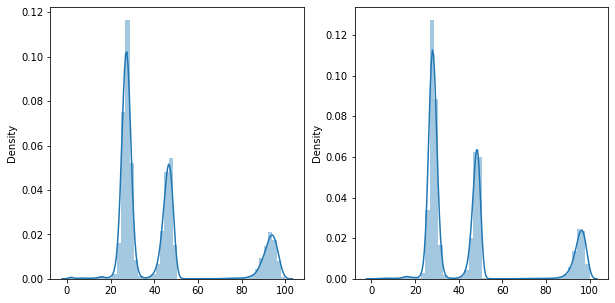

In [18]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.distplot(x=data["numGroups"],ax=ax[0])
sns.distplot(x=data["maxPlace"],ax=ax[1])

###"numGroups","maxPlace" cols are almost similar

#'Id' , 'groupId' , 'matchId'

---

---





In [19]:
data.describe(include="object")

,Id,groupId,matchId,matchType
count,4446966,4446966,4446966,4446966
unique,4446966,2026745,47965,16
top,217f96d81bf229,14d6b54cdec6bc,5e3385da1d13b5,squad-fpp
freq,1,74,100,1756186


###We see these three columns are highly cardinal.

#"matchType"

---

---





###Let's check the frequency of MatchType.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

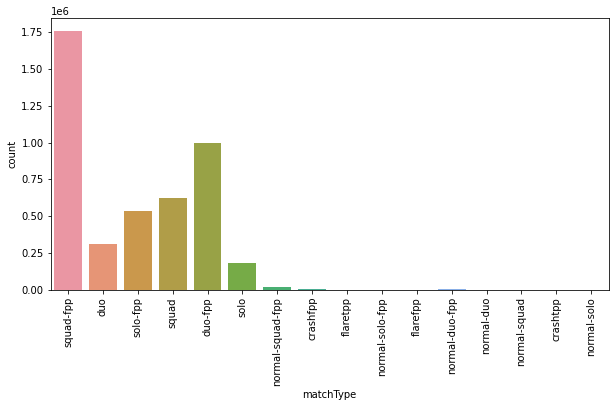

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(x=data["matchType"])
plt.xticks(rotation=90)

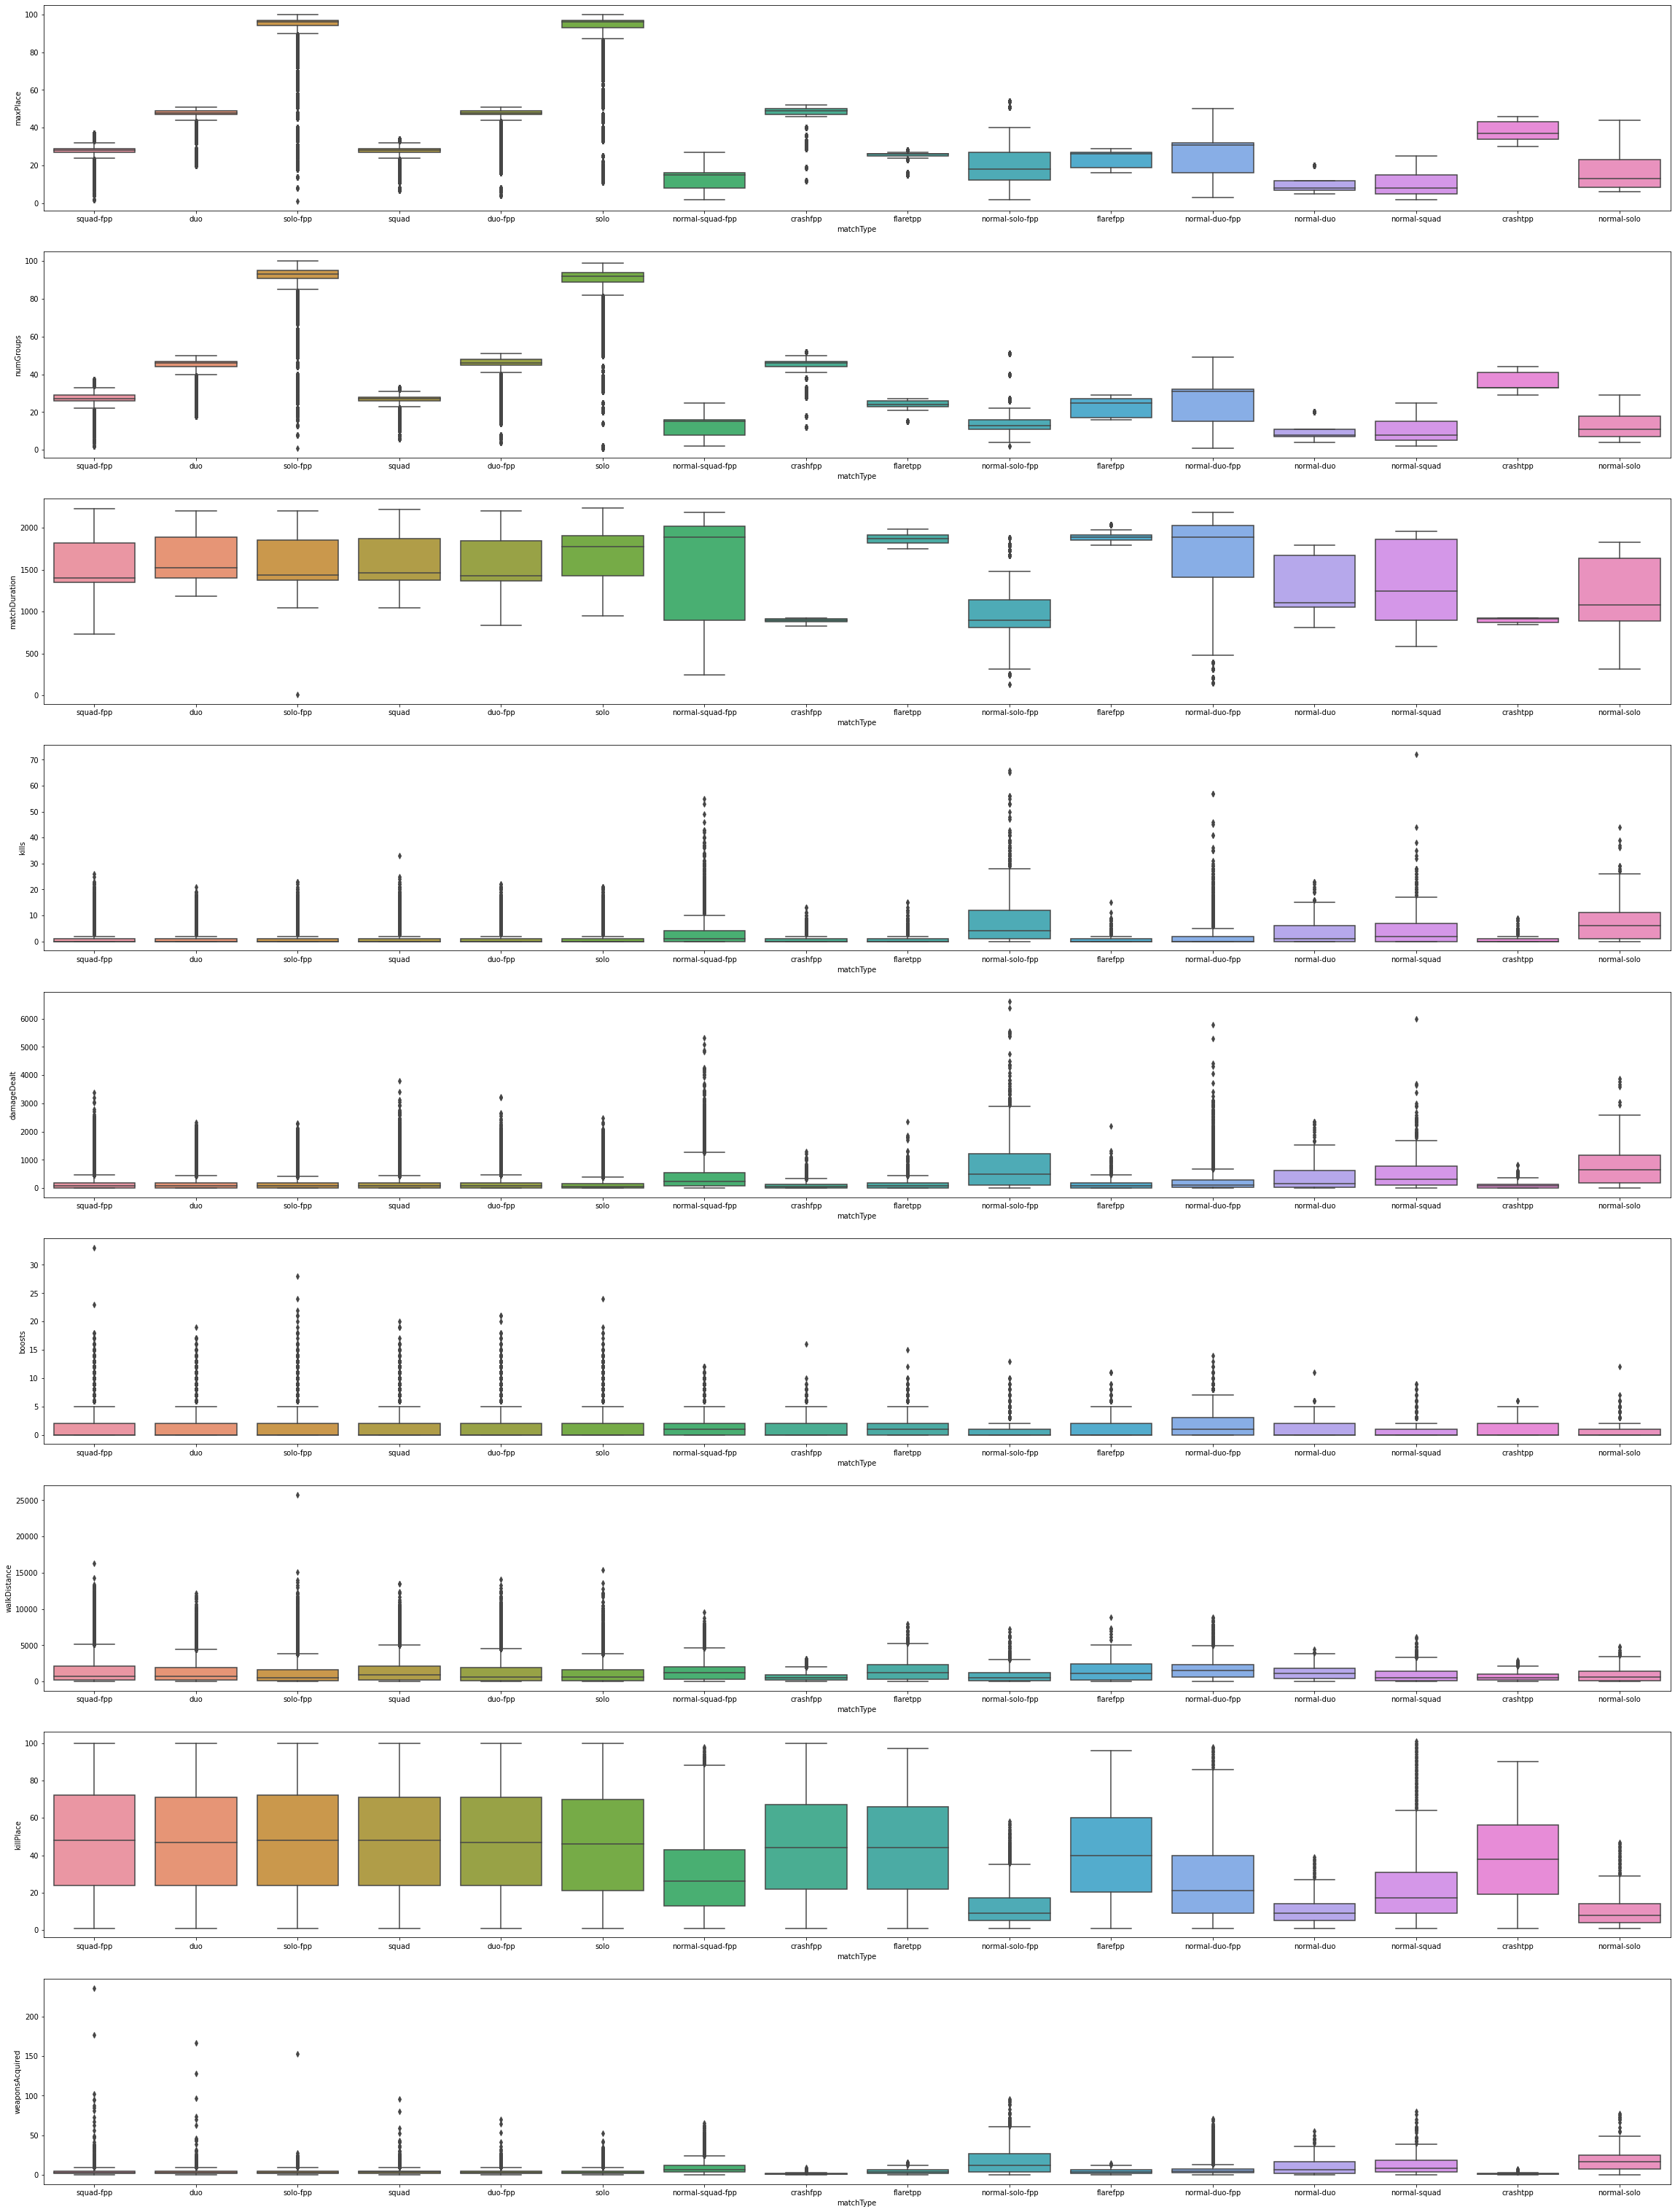

In [21]:
fig, ax = plt.subplots(9,1,figsize=(40,55)) 
sns.boxplot(y=data["maxPlace"],x=data["matchType"],ax=ax[0])
sns.boxplot(y=data["numGroups"],x=data["matchType"],ax=ax[1])
sns.boxplot(y=data["matchDuration"],x=data["matchType"],ax=ax[2])
sns.boxplot(y=data["kills"],x=data["matchType"],ax=ax[3])
sns.boxplot(y=data["damageDealt"],x=data["matchType"],ax=ax[4])
sns.boxplot(y=data["boosts"],x=data["matchType"],ax=ax[5])
sns.boxplot(y=data["walkDistance"],x=data["matchType"],ax=ax[6])
sns.boxplot(y=data["killPlace"],x=data["matchType"],ax=ax[7])
sns.boxplot(y=data["weaponsAcquired"],x=data["matchType"],ax=ax[8])

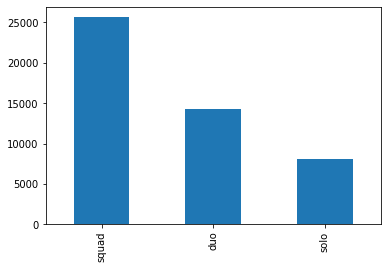

In [22]:
type_play = lambda x: 'solo' if ('solo' in x) else 'duo' if ('duo' in x) or ('crash' in x) else 'squad'
data['matchType3'] = data['matchType'].apply(type_play)
data.groupby('matchId')['matchType3'].first().value_counts().plot.bar()

In [23]:
data.drop(['Id','groupId','matchId'],inplace=True, axis = 1)
print("Done.")

Done.


#'Kills'

---

---








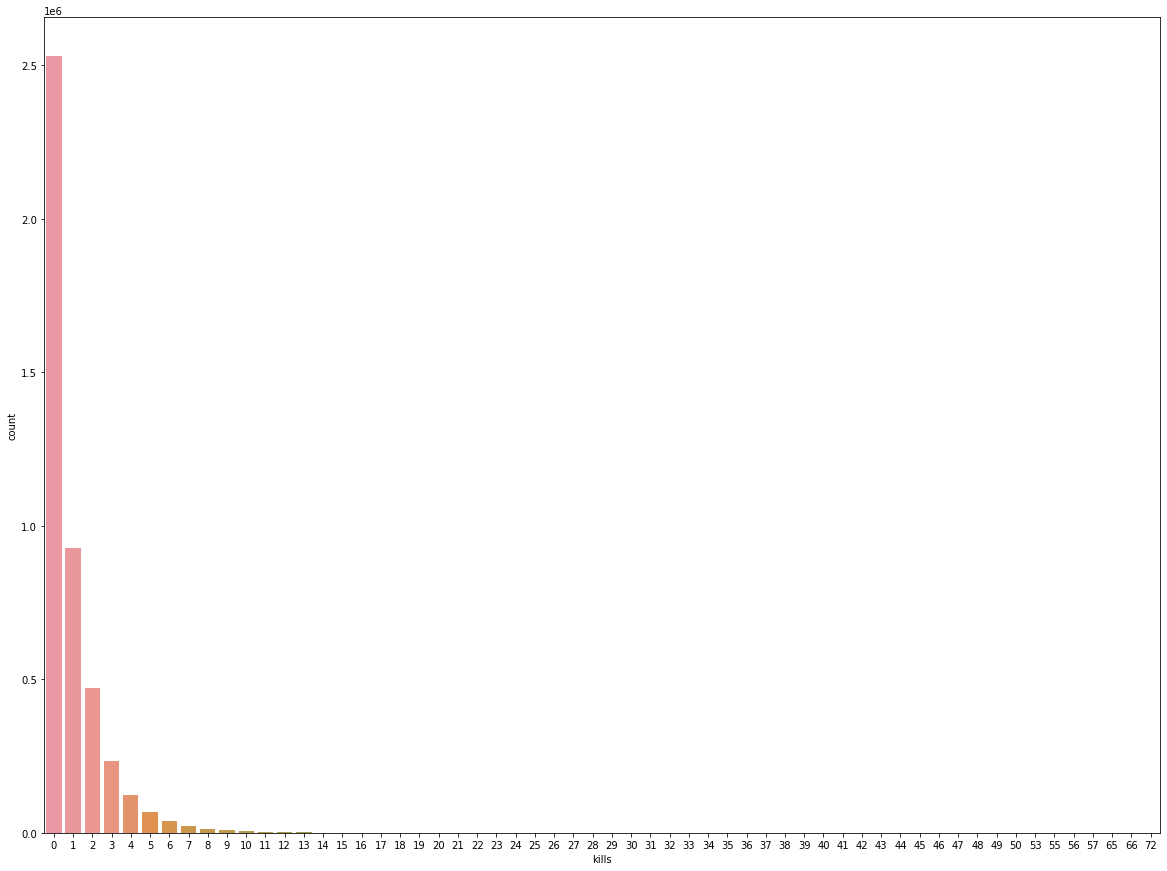

In [24]:
plt.figure(figsize=(20,15))
sns.countplot(data['kills'])

###We see there are outliers in no. of kills.So lets check whether higher kills like 72 is in real or work of a hacker.Lets group the kills.

In [25]:
data['kill_grp'] = pd.cut(data['kills'],[-1,0,2,4,6,8,10,80],labels=['kill 0','kill 1-2','kill 3-4','kill 5-6','kill 7-8','kill 9-10','kill 10+'])

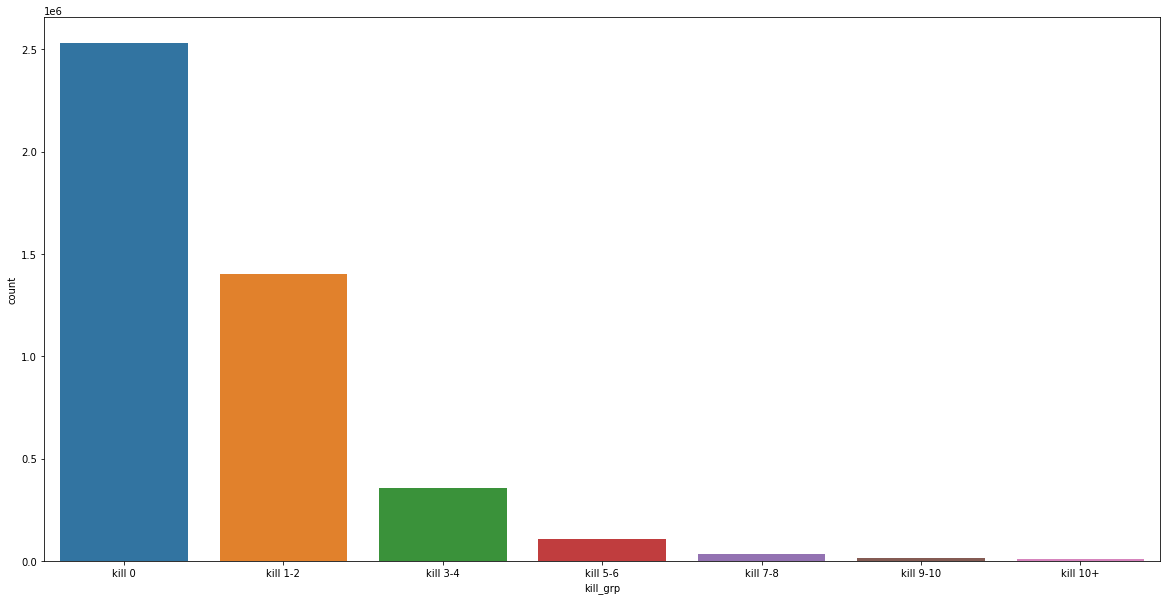

In [26]:
plt.figure(figsize=(20,10))
sns.countplot(data['kill_grp'])

###Max people had 0 kill and very few have more than 5+ kills.

In [27]:
print('{} % people did not move a metre yet got more than 1 kills.'.format(100*len(data[(data['rideDistance']==0) & (data['walkDistance']==0) & (data['swimDistance']==0) & (data['kills']>1)])/len(data)))

0.02482591501711504 % people did not move a metre yet got more than 1 kills.


In [28]:
data.drop(data[(data['rideDistance']==0) & (data['walkDistance']==0) & (data['swimDistance']==0) & (data['kills']>1)].index,inplace = True)

#"Heals"

---

---







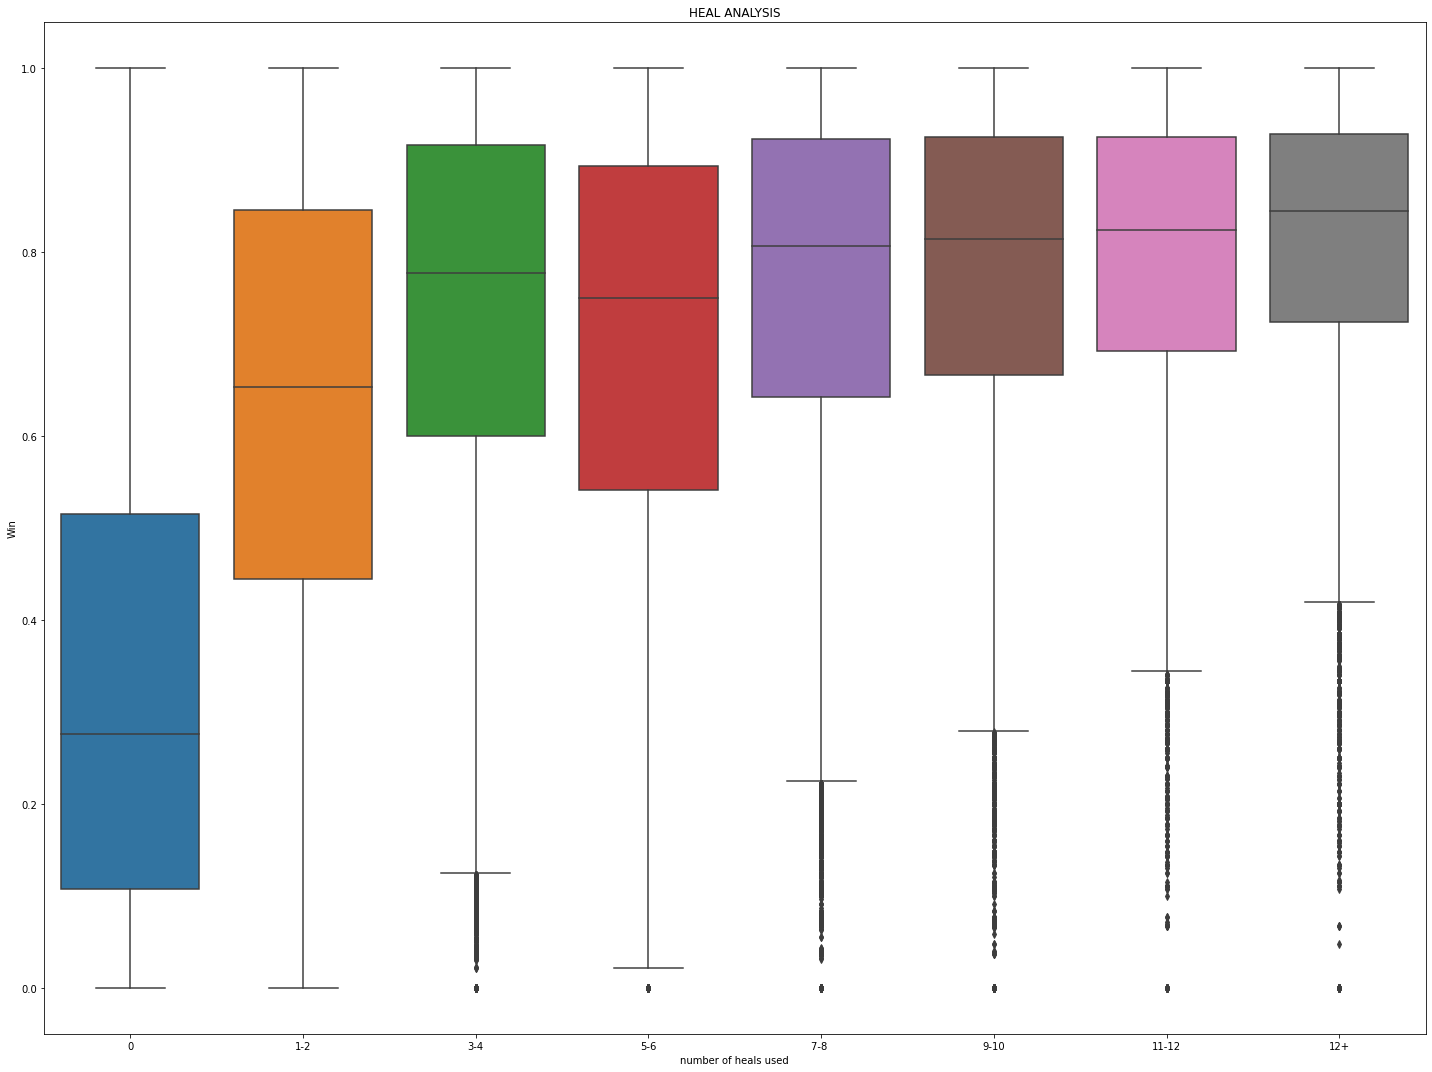

In [29]:
data['heal_cat'] = pd.cut(data['heals'],(-1,0,2,4,6,8,10,12,90),labels=['0','1-2','3-4','5-6','7-8 ','9-10','11-12','12+'])

plt.figure(figsize=(20,15))
sns.boxplot(data['heal_cat'],data['winPlacePerc'])
plt.title("HEAL ANALYSIS")
plt.xlabel("number of heals used")
plt.ylabel("Win")
plt.tight_layout()

###People using more than 6 heals has higher chances of winning.It could be because they killed alot or had too many damages while walking or fighting.

<Figure size 720x360 with 0 Axes>

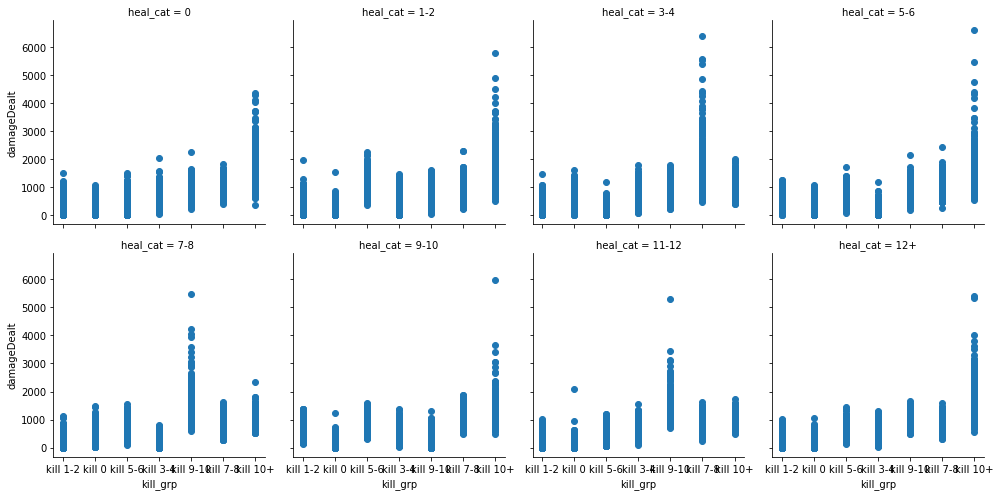

In [30]:
plt.figure(figsize=(10,5))
g = sns.FacetGrid(data,  col='heal_cat', height=3.5,col_wrap=4)
g.map(plt.scatter,"kill_grp","damageDealt")
plt.show()

###We see people having more than 10+ kills use 0 heals and we also see that people with 0 kills uses 12+ heals.

In [31]:
data[(data['heals']==0) & (data['kills']>10)]

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,matchType3,kill_grp,heal_cat
12668,1,9,"1,191.00",7,1,0,1,0,11,2,195.80,1386,squad-fpp,28,27,1805,1,"1,224.00",0,0.00,0,0,"3,369.00",8,0,1.00,squad,kill 10+,0
13131,2,0,"1,205.00",5,0,0,1,0,13,4,33.43,875,crashfpp,47,45,1500,0,"3,484.00",1,0.00,0,2,"1,153.00",1,0,1.00,duo,kill 10+,0
13418,3,0,"1,169.00",0,4,0,8,1000,14,2,121.80,769,normal-squad-fpp,8,8,-1,0,0.00,0,0.00,0,0,122.90,26,1500,0.86,squad,kill 10+,0
19531,9,0,"2,856.00",32,3,0,1,0,24,4,84.23,1195,normal-squad-fpp,6,6,1500,0,0.00,0,0.00,0,0,"1,136.00",20,0,0.80,squad,kill 10+,0
22389,2,0,"1,324.00",0,2,0,4,1000,18,3,114.00,936,normal-squad-fpp,5,5,-1,0,0.00,0,0.00,0,0,35.21,28,1500,0.50,squad,kill 10+,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4413845,1,0,"1,101.00",0,7,0,7,1000,11,2,63.82,1083,normal-solo,9,8,-1,0,0.00,0,0.00,0,0,348.60,21,1500,0.25,solo,kill 10+,0
4418629,4,0,"1,634.00",0,2,0,7,0,14,2,52.12,895,normal-solo-fpp,20,16,1500,0,"3,652.00",0,0.00,0,0,"1,026.00",34,0,0.68,solo,kill 10+,0
4422538,3,1,"1,389.00",0,8,0,1,1000,16,3,140.30,890,normal-duo-fpp,6,5,-1,0,0.00,0,0.00,0,0,699.10,16,1500,1.00,duo,kill 10+,0
4426908,3,1,"1,000.00",10,1,0,13,0,12,2,39.00,1195,normal-squad-fpp,6,6,1500,4,0.00,0,0.00,0,0,191.10,28,0,1.00,squad,kill 10+,0


###It is obvious that you can't get high kills with no boosts.It is sure the work of a hacker so lets remove them.

In [32]:
data.drop(data[(data['heals']==0) & (data['kills']>11)].index,inplace = True)

In [33]:
data[(data['heals']>10) & (data['kills']==0) & (data['damageDealt']==0)]

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,matchType3,kill_grp,heal_cat
72,0,3,0.00,0,0,13,49,0,0,0,0.00,1358,squad-fpp,30,30,1531,0,0.00,0,0.00,1,0,"3,165.00",7,0,0.97,squad,kill 0,12+
2296,0,5,0.00,0,0,29,45,0,0,0,0.00,1882,solo,96,94,1508,0,759.00,0,0.00,0,1,"2,042.00",6,0,0.93,solo,kill 0,12+
2631,0,2,0.00,0,0,11,48,1425,0,0,0.00,1364,duo-fpp,48,45,-1,0,"2,393.00",0,0.00,0,0,791.30,5,1656,0.70,duo,kill 0,11-12
2837,0,3,0.00,1,0,11,50,0,0,0,0.00,1886,duo,50,46,1504,0,"5,725.00",0,0.00,0,0,"2,085.00",6,0,0.67,duo,kill 0,11-12
3157,0,6,0.00,0,0,17,42,0,0,0,0.00,1425,solo-fpp,86,84,1757,0,"1,232.00",0,0.00,0,0,"2,490.00",6,0,0.92,solo,kill 0,12+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4445664,0,9,0.00,0,0,16,42,0,0,0,0.00,2013,solo,93,90,1522,0,0.00,0,9.59,0,0,"3,952.00",4,0,0.89,solo,kill 0,12+
4445930,0,2,0.00,1,0,11,48,0,0,0,0.00,1878,duo,47,44,1504,1,0.00,0,49.53,1,0,"4,800.00",4,0,0.85,duo,kill 0,11-12
4446262,0,0,0.00,0,0,11,35,1038,0,0,0.00,2002,squad,25,23,0,1,417.00,0,331.60,0,0,"2,885.00",4,1494,0.83,squad,kill 0,11-12
4446626,0,9,0.00,0,0,23,55,1140,0,0,0.00,1892,squad-fpp,31,31,-1,0,0.00,0,0.00,0,0,"2,330.00",9,1553,0.67,squad,kill 0,12+


###We see 6974 people had 0 damage and kills yet used more than 10 heals.

In [34]:
data.drop(data[(data['heals']>10) & (data['kills']==0) & (data['damageDealt']==0)].index,inplace = True)

In [35]:
data[(data['killStreaks'] == data['kills']) & (data['kills']>9) & (data['heals']==0)]

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,matchType3,kill_grp,heal_cat
2767999,0,0,"1,102.00",0,0,0,1,1497,11,11,0.00,1946,solo,88,77,-1,0,"4,118.00",11,0.00,0,0,816.60,5,1533,0.47,solo,kill 10+,0
3954337,0,0,"1,000.00",0,0,0,2,1350,10,10,0.00,1992,solo,93,81,-1,0,577.60,10,0.00,0,0,86.48,0,1398,0.22,solo,kill 9-10,0


###We see 2 people have continously killed more than 9 without taking any heals which is oviously hacker.

In [36]:
data.drop(data[(data['killStreaks'] == data['kills']) & (data['kills']>9) & (data['heals']==0)].index,inplace = True)

#DISTANCE

---

---





In [37]:
data[["rideDistance","swimDistance","walkDistance"]].describe()

,rideDistance,swimDistance,walkDistance
count,"4,438,245.00","4,438,245.00","4,438,245.00"
mean,603.53,4.49,"1,146.72"
std,"1,493.75",30.15,"1,179.38"
min,0.00,0.00,0.00
25%,0.00,0.00,154.90
50%,0.00,0.00,682.90
75%,0.03,0.00,"1,973.00"
max,"40,710.00","3,823.00","25,780.00"


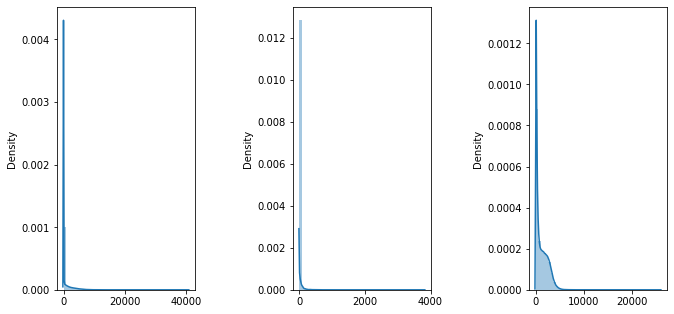

In [38]:
fig, ax = plt.subplots(1,3,figsize=(10,5))
sns.distplot(x=data["rideDistance"],ax=ax[0])
sns.distplot(x=data["swimDistance"],ax=ax[1])
sns.distplot(x=data["walkDistance"],ax=ax[2])
fig.tight_layout(pad=3.0)

###All the distance covered are right skewed.

In [39]:
data['ride_cat'] = pd.cut(data['rideDistance'],(-1,100,1000,5000,10000,50000),labels=['0-100','101-1000','1001-5000','5001-10000','10000+'])
data['swim_cat'] = pd.cut(data['swimDistance'],(-1,100,1000,5000,10000,50000),labels=['0-100','101-1000','1001-5000','5001-10000','10000+'])
data['walk_cat'] = pd.cut(data['walkDistance'],(-1,100,1000,5000,10000,50000),labels=['0-100','101-1000','1001-5000','5001-10000','10000+'])

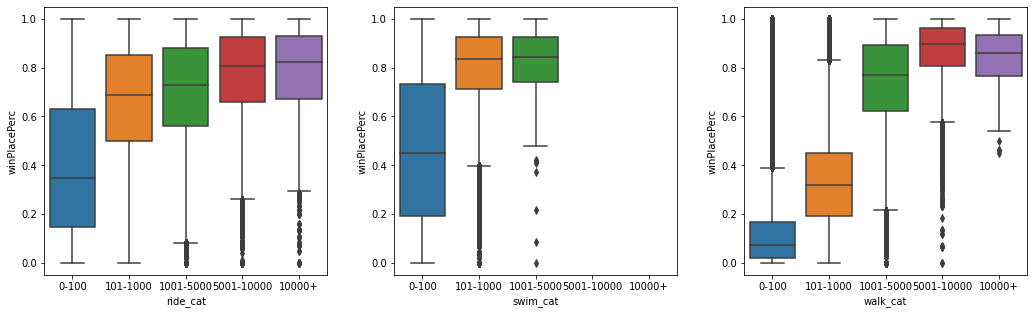

In [40]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(data['ride_cat'],data['winPlacePerc'],ax=ax[0])
sns.boxplot(data['swim_cat'],data['winPlacePerc'],ax=ax[1])
sns.boxplot(data['walk_cat'],data['winPlacePerc'],ax=ax[2])
fig.tight_layout(pad=3.0)

###Higher the distance more is the chances of winning.

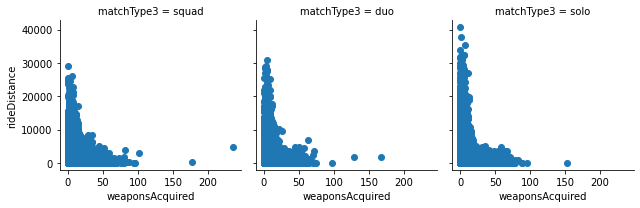

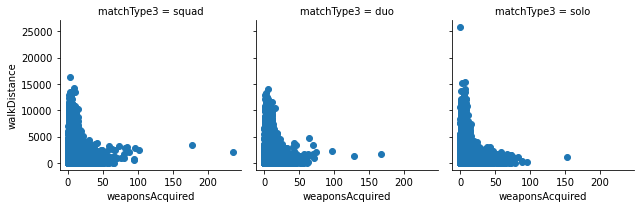

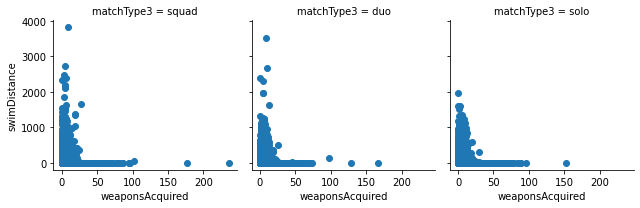

In [41]:
g = sns.FacetGrid(data,  col='matchType3')
g.map(plt.scatter,"weaponsAcquired","rideDistance")
plt.show()
g = sns.FacetGrid(data,  col='matchType3')
g.map(plt.scatter,"weaponsAcquired","walkDistance")
plt.show()
g = sns.FacetGrid(data,  col='matchType3')
g.map(plt.scatter,"weaponsAcquired","swimDistance")
plt.show()

###We see many moving distance is 0 yet weapons acquired are greater than 1. 

In [42]:
print('{} % people did not move a metre yet acquired weapons.'.format(100*len(data[(data['rideDistance']==0) & (data['walkDistance']==0) & (data['swimDistance']==0) & (data['weaponsAcquired']>1)])/len(data)))

0.15138866826865124 % people did not move a metre yet acquired weapons.


###This could mean that these people were some kind of hackers so lets remove them.

In [43]:
data.drop(data[(data['rideDistance']==0) & (data['walkDistance']==0) & (data['swimDistance']==0) & (data['weaponsAcquired']>1)].index,inplace = True)

In [44]:
data[(data['rideDistance'] == 0) & (data['roadKills']>0)]

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,matchType3,kill_grp,heal_cat,ride_cat,swim_cat,walk_cat
820,1,1,334.80,4,0,1,17,1187,2,1,50.98,1714,squad-fpp,28,28,-1,0,0.00,1,0.00,0,0,838.00,6,1533,0.37,squad,kill 1-2,1-2,0-100,0-100,101-1000
40362,0,1,272.40,1,1,2,22,0,2,1,115.60,1336,squad-fpp,29,29,1500,0,0.00,1,127.70,0,0,"2,443.00",4,0,0.54,squad,kill 1-2,1-2,0-100,101-1000,1001-5000
46376,2,5,298.90,3,0,6,12,1378,2,1,15.09,1870,duo,50,49,-1,1,0.00,1,0.00,0,0,"3,054.00",4,1509,0.90,duo,kill 1-2,5-6,0-100,0-100,1001-5000
50918,0,0,169.30,1,0,0,39,0,1,1,14.42,1871,duo-fpp,46,44,1453,0,0.00,1,0.00,0,0,148.60,1,0,0.13,duo,kill 1-2,0,0-100,0-100,101-1000
55266,0,0,100.00,2,0,0,31,0,1,1,64.06,1351,squad-fpp,28,24,1486,1,0.00,1,0.00,1,0,696.00,3,0,0.37,squad,kill 1-2,0,0-100,0-100,101-1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4417743,0,3,328.90,1,1,2,4,1050,4,2,127.00,1363,duo,47,45,-1,0,0.00,1,104.60,0,0,"2,505.00",4,1499,0.87,duo,kill 3-4,1-2,0-100,101-1000,1001-5000
4418648,0,0,96.43,1,0,0,31,1211,1,1,7.68,1848,squad-fpp,27,27,-1,0,0.00,1,0.00,0,0,"1,293.00",3,1429,0.35,squad,kill 1-2,0,0-100,0-100,1001-5000
4426830,0,0,100.00,1,0,0,36,0,1,1,0.80,1889,squad,26,25,1512,0,0.00,1,0.00,0,0,29.41,1,0,0.04,squad,kill 1-2,0,0-100,0-100,0-100
4444830,0,6,442.90,4,0,6,4,1175,5,2,59.23,1371,duo-fpp,50,49,-1,0,0.00,1,0.00,0,0,"2,875.00",5,1503,0.84,duo,kill 5-6,5-6,0-100,0-100,1001-5000


###186 people didn't ride yet got roadkills which is obviously not possible.

In [45]:
data.drop(data[(data['rideDistance'] == 0) & (data['roadKills']>0)].index,inplace = True)

#"winPlacePerc"

---

---







In [46]:
data['Win%'] = pd.cut(data['winPlacePerc'],[-1,0.099,0.199,0.299,0.399,0.499,0.599,0.699,0.799,0.899,0.999,1],labels=['%0_0.09','%0.1_0.19','%0.2_0.29','%0.3_0.39','%0.4_0.49','%0.5_0.59','%0.6_0.69','%0.7_0.79','%0.8_0.89','%0.9_0.99','First'])

(array([     0., 100000., 200000., 300000., 400000., 500000., 600000.,
        700000.]), <a list of 8 Text major ticklabel objects>)

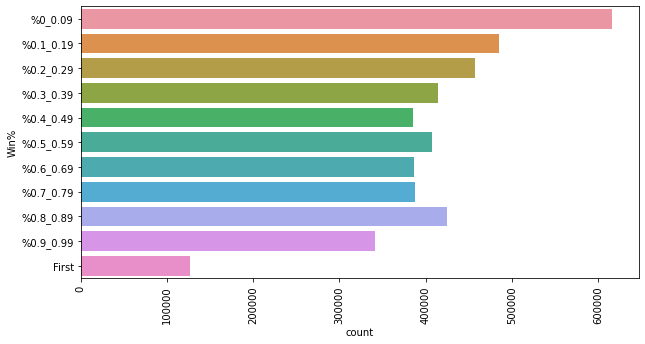

In [47]:
plt.figure(figsize=(10,5))
sns.countplot(y=data['Win%'])
plt.xticks(rotation=90)

#'longestKill'

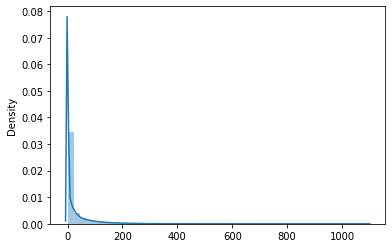

In [48]:
sns.distplot(x=data["longestKill"])

In [49]:
data['long_cat'] = pd.cut(data['longestKill'],(-1,50,100,500,5000),labels=['0-50','51-100','101-500','500+'])

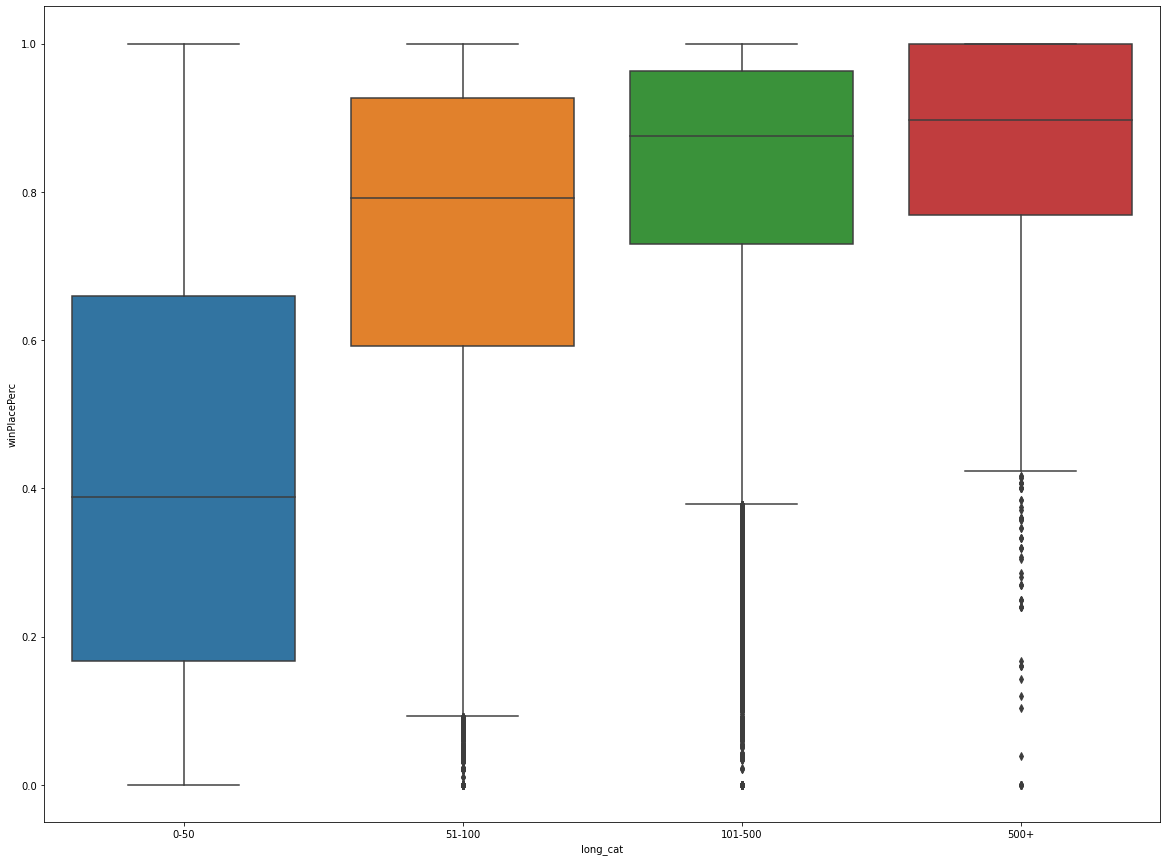

In [50]:
plt.figure(figsize=(20,15))
sns.boxplot(data['long_cat'],data['winPlacePerc'])

###Higher the longest kill more is the chance of winning.

#Lets analyse those players who won without a weapon.

---






In [51]:
xx=data[(data['Win%']=='First') & (data['weaponsAcquired']==0)]

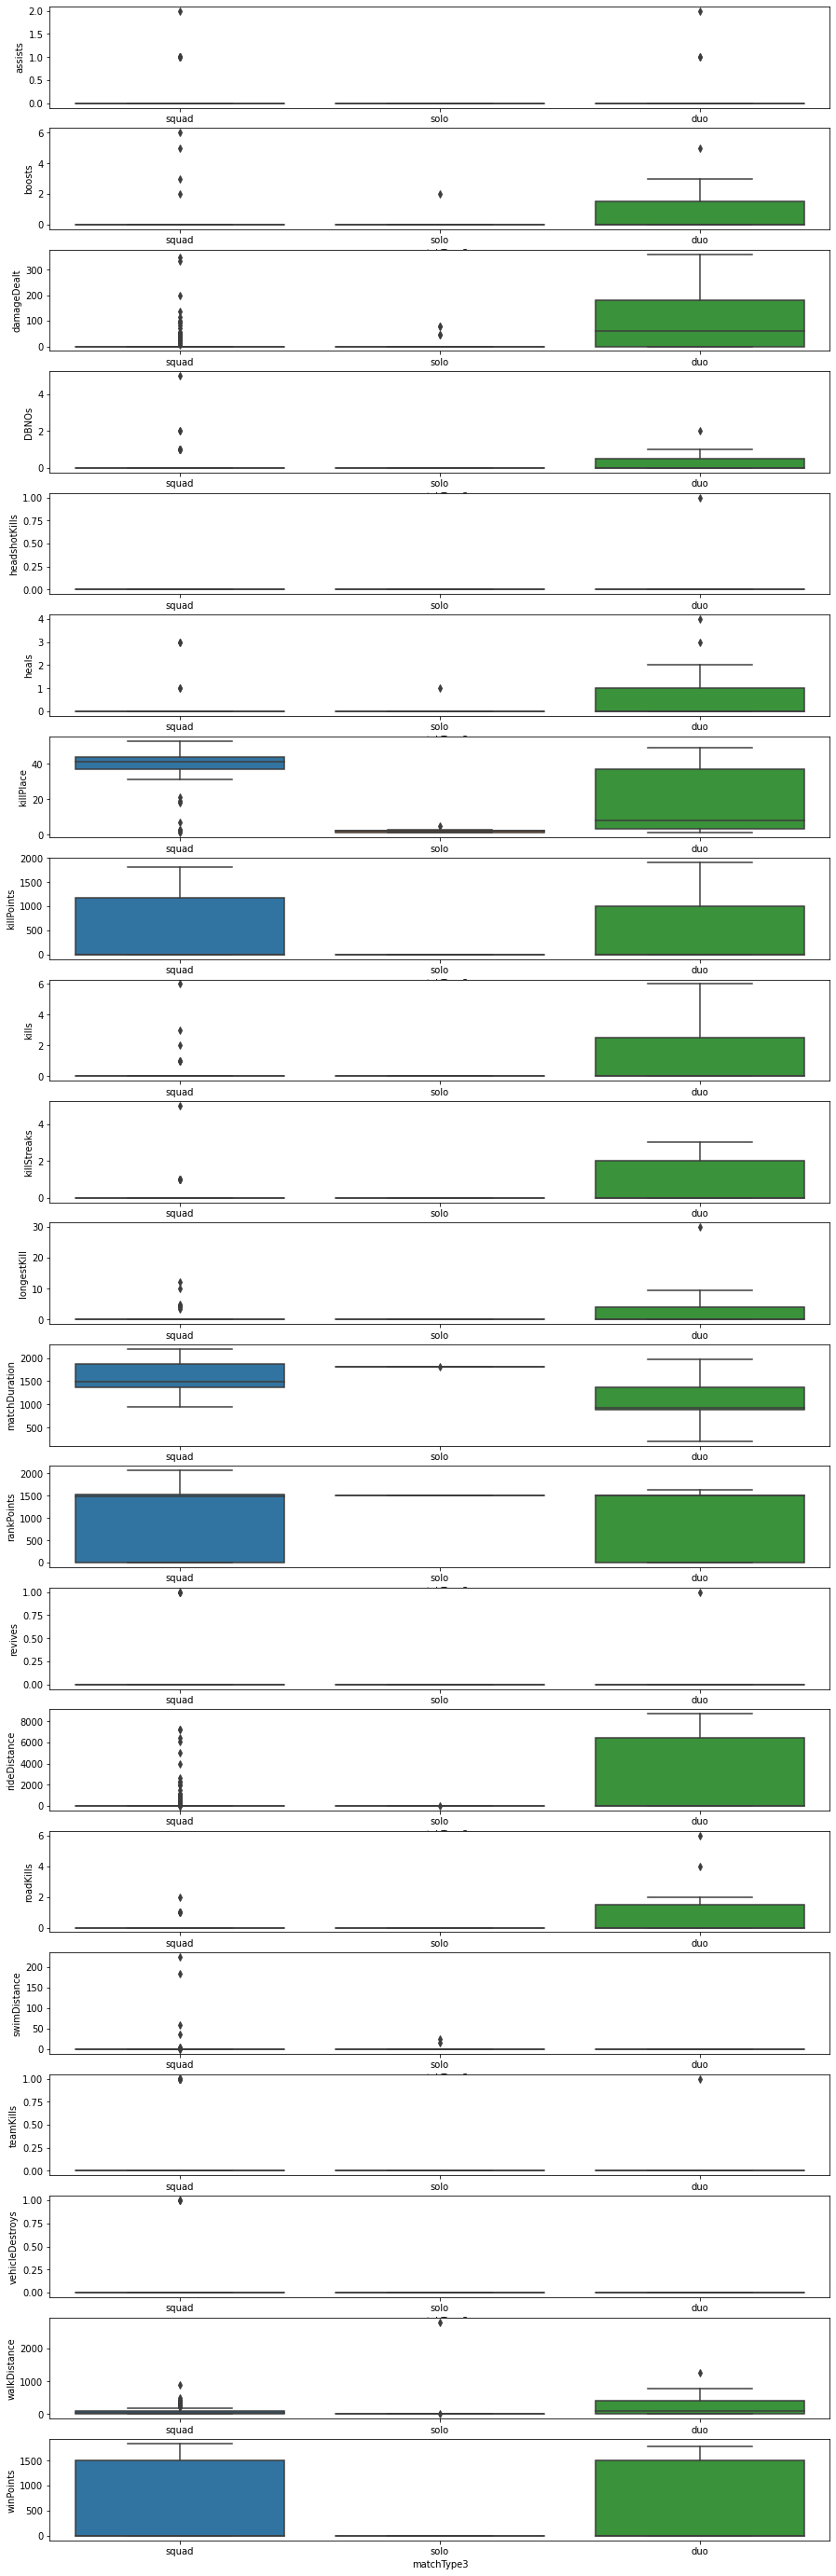

In [52]:
fig, ax = plt.subplots(21,1,figsize=(15,50)) 
sns.boxplot(y=xx["assists"],x=xx["matchType3"],ax=ax[0])
sns.boxplot(y=xx["boosts"],x=xx["matchType3"],ax=ax[1])
sns.boxplot(y=xx["damageDealt"],x=xx["matchType3"],ax=ax[2])
sns.boxplot(y=xx["DBNOs"],x=xx["matchType3"],ax=ax[3])
sns.boxplot(y=xx["headshotKills"],x=xx["matchType3"],ax=ax[4])
sns.boxplot(y=xx["heals"],x=xx["matchType3"],ax=ax[5])
sns.boxplot(y=xx["killPlace"],x=xx["matchType3"],ax=ax[6])
sns.boxplot(y=xx["killPoints"],x=xx["matchType3"],ax=ax[7])
sns.boxplot(y=xx["kills"],x=xx["matchType3"],ax=ax[8])
sns.boxplot(y=xx["killStreaks"],x=xx["matchType3"],ax=ax[9])
sns.boxplot(y=xx["longestKill"],x=xx["matchType3"],ax=ax[10])
sns.boxplot(y=xx["matchDuration"],x=xx["matchType3"],ax=ax[11])
sns.boxplot(y=xx["rankPoints"],x=xx["matchType3"],ax=ax[12])
sns.boxplot(y=xx["revives"],x=xx["matchType3"],ax=ax[13])
sns.boxplot(y=xx["rideDistance"],x=xx["matchType3"],ax=ax[14])
sns.boxplot(y=xx["roadKills"],x=xx["matchType3"],ax=ax[15])
sns.boxplot(y=xx["swimDistance"],x=xx["matchType3"],ax=ax[16])
sns.boxplot(y=xx["teamKills"],x=xx["matchType3"],ax=ax[17])
sns.boxplot(y=xx["vehicleDestroys"],x=xx["matchType3"],ax=ax[18])
sns.boxplot(y=xx["walkDistance"],x=xx["matchType3"],ax=ax[19])
sns.boxplot(y=xx["winPoints"],x=xx["matchType3"],ax=ax[20])

###I feel the solo  group did nothing special to come first so i think we should remove them.

In [53]:
data.drop(data[(data['Win%']=='First') & (data['weaponsAcquired']==0) & (data['matchType3']=='solo')].index,inplace = True)

#Feature importance

---

---





In [94]:
from sklearn.ensemble import ExtraTreesRegressor,RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [58]:
data.dtypes

assists                int8
boosts                 int8
damageDealt         float32
DBNOs                  int8
headshotKills          int8
heals                  int8
killPlace              int8
killPoints            int16
kills                  int8
killStreaks            int8
longestKill         float32
matchDuration         int16
matchType            object
maxPlace               int8
numGroups              int8
rankPoints            int16
revives                int8
rideDistance        float32
roadKills              int8
swimDistance        float32
teamKills              int8
vehicleDestroys        int8
walkDistance        float32
weaponsAcquired       int16
winPoints             int16
winPlacePerc        float32
matchType3           object
kill_grp           category
heal_cat           category
ride_cat           category
swim_cat           category
walk_cat           category
Win%               category
long_cat           category
dtype: object

In [60]:
data.drop(['kill_grp','heal_cat','ride_cat','swim_cat','walk_cat','Win%','long_cat'],axis=1,inplace=True)

In [61]:
data_enc = data.apply(LabelEncoder().fit_transform)

In [62]:
data_enc.head(20)

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,matchType3
0,0,0,0,0,0,0,59,864,0,0,0,424,15,27,25,0,0,0,0,0,0,0,23558,1,931,1333,2
1,0,0,18604,0,0,0,56,0,0,0,0,851,15,25,24,858,0,45,0,13752,0,0,31544,5,0,1918,2
2,1,0,16257,0,0,0,46,0,0,0,0,436,2,49,46,865,0,0,0,0,0,0,22728,2,0,2326,0
3,0,0,12747,0,0,0,74,0,0,0,0,554,15,30,29,782,0,0,0,0,0,0,23137,3,0,501,2
4,0,0,19457,0,0,0,44,0,1,1,18907,542,13,96,94,934,0,0,0,0,0,0,17085,2,0,564,1
5,0,0,19457,1,1,0,43,0,1,1,14898,513,15,27,27,792,0,0,0,0,0,0,15580,1,0,108,2
6,0,0,0,0,0,0,95,885,0,0,0,434,15,27,27,0,0,0,0,0,0,0,13460,1,962,0,2
7,0,0,9091,0,0,0,47,623,0,0,0,1041,13,95,91,0,0,24693,0,0,0,0,31199,6,965,2209,1
8,0,0,14617,0,0,0,63,0,0,0,0,493,14,27,26,867,0,0,0,0,0,0,29109,4,0,1111,2
9,0,0,13184,0,0,0,73,0,0,0,0,1004,14,28,26,723,0,0,0,0,0,0,18677,1,0,644,2


In [63]:
#working of the huge data requires huge computation power let's take a sample of 300000 rows.
samp_data = data_enc.sample(300000)

In [66]:
print(data.shape)
print(samp_data.shape)

(4431323, 27)
(300000, 27)


In [67]:
x = samp_data.drop(['winPlacePerc'],axis=1)
y = samp_data['winPlacePerc']

In [69]:
etr = ExtraTreesRegressor().fit(x,y)

In [70]:
print(etr.feature_importances_.shape)

(26,)


In [71]:
col = x.columns
print(col.shape)
print(col)
x.dtypes

(26,)
Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill',
       'matchDuration', 'matchType', 'maxPlace', 'numGroups', 'rankPoints',
       'revives', 'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'matchType3'],
      dtype='object')


assists            int64
boosts             int64
damageDealt        int64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        int64
matchDuration      int64
matchType          int64
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       int64
roadKills          int64
swimDistance       int64
teamKills          int64
vehicleDestroys    int64
walkDistance       int64
weaponsAcquired    int64
winPoints          int64
matchType3         int64
dtype: object

In [72]:
etr_feat= etr.feature_importances_
print(etr_feat.shape)
print(etr_feat)

(26,)
[3.58629434e-03 7.44742475e-02 8.99406213e-03 4.31953849e-03
 2.31900736e-03 1.14721700e-02 3.62077171e-01 2.81669897e-03
 1.07601992e-02 1.31372199e-02 2.18119552e-02 1.61759180e-02
 5.17175885e-03 1.17028501e-02 1.44121559e-02 3.67641631e-03
 2.37712054e-03 2.45510834e-02 1.98328560e-04 1.86980800e-03
 8.36699505e-04 3.44404019e-04 3.75360453e-01 2.01276016e-02
 2.58326337e-03 4.84357458e-03]


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text major ticklabel objects>)

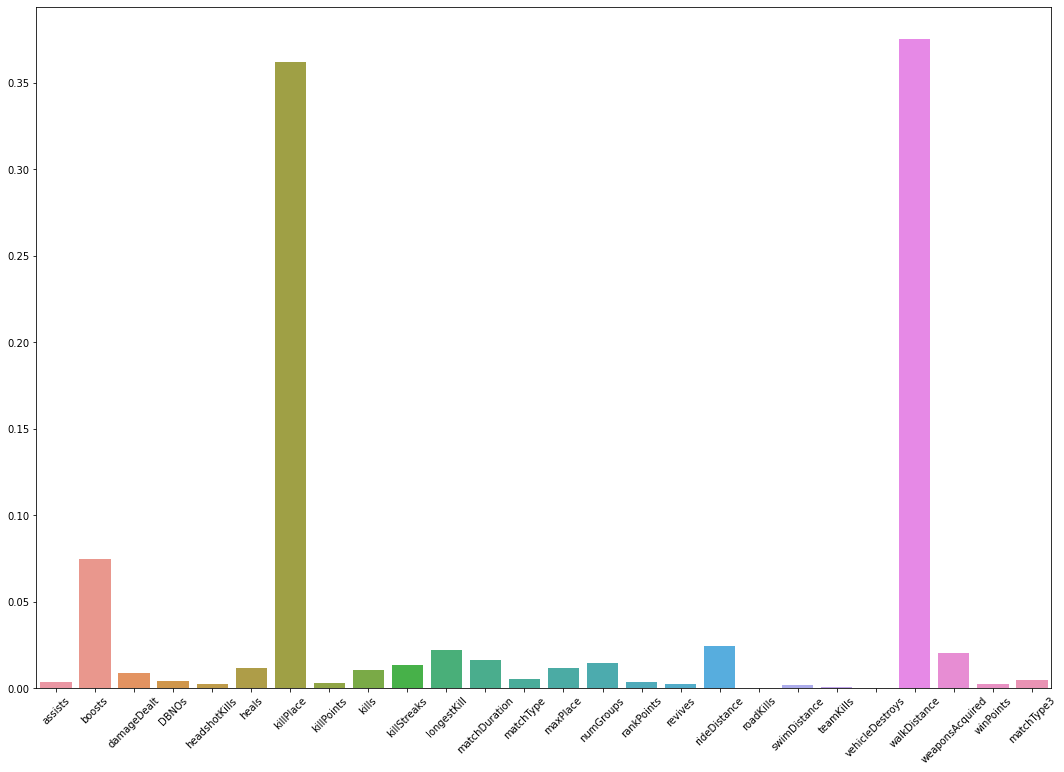

In [111]:
plt.figure(figsize=(15,10))
sns.barplot(col,etr_feat)
plt.tight_layout()

plt.xticks(rotation=45)

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [76]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.10,random_state = 123)

#Predicting Using different algorithm.

---

---





In [77]:
linear_model = LinearRegression().fit(x_train,y_train)

In [78]:
tree_model = DecisionTreeRegressor().fit(x_train,y_train)

In [79]:
forest_model = RandomForestRegressor().fit(x_train,y_train)

In [80]:
ada_model = AdaBoostRegressor().fit(x_train,y_train)

In [81]:
xgb_model = XGBRegressor().fit(x_train,y_train)

[09:22:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [82]:
neighbor_model = KNeighborsRegressor().fit(x_train,y_train)

#Predicting on train

---

---





In [83]:
lineartrain = linear_model.predict(x_train)
treetrain = tree_model.predict(x_train)
foresttrain = forest_model.predict(x_train)
neighbortrain = neighbor_model.predict(x_train)
xgbtrain = xgb_model.predict(x_train)
adatrain = ada_model.predict(x_train)

In [84]:
k = len(x_train.columns)
n = len(x_train)
adr = (n-1)/(n-k-1)
print(k)
print(n)
print(adr)

26
270000
1.000096305926889


###Linear Model accuracy

In [95]:
print('MAE :',mean_absolute_error(y_train,lineartrain))
print('MSE :',mean_squared_error(y_train,lineartrain))
print('RMSE :',np.sqrt(mean_squared_error(y_train,lineartrain)))
print('R-Squared :',r2_score(y_train,lineartrain))
print('Adjusted R-Squared :',1-(adr*(1-r2_score(y_train,lineartrain))))
print('VIF :',1/(1-r2_score(y_train,lineartrain)))

MAE : 308.0707717037756
MSE : 164533.3481114479
RMSE : 405.62710475441344
R-Squared : 0.8055434206976131
Adjusted R-Squared : 0.8055246933765037
VIF : 5.142536208275907


###Decision tree accuracy

In [96]:
print('MAE :',mean_absolute_error(y_train,treetrain))
print('MSE :',mean_squared_error(y_train,treetrain))
print('RMSE :',np.sqrt(mean_squared_error(y_train,treetrain)))
print('R-Squared :',r2_score(y_train,treetrain))
print('Adjusted R-Squared :',1-(adr*(1-r2_score(y_train,treetrain))))
print('VIF :',1/(1-r2_score(y_train,treetrain)))

MAE : 0.0
MSE : 0.0
RMSE : 0.0
R-Squared : 1.0
Adjusted R-Squared : 1.0
VIF : inf


###RandomForest accuracy

In [97]:
print('MAE :',mean_absolute_error(y_train,foresttrain))
print('MSE :',mean_squared_error(y_train,foresttrain))
print('RMSE :',np.sqrt(mean_squared_error(y_train,foresttrain)))
print('R-Squared :',r2_score(y_train,foresttrain))
print('Adjusted R-Squared :',1-(adr*(1-r2_score(y_train,foresttrain))))
print('VIF :',1/(1-r2_score(y_train,foresttrain)))

MAE : 67.33265451851851
MSE : 9105.37980416889
RMSE : 95.42211381104953
R-Squared : 0.9892386496093887
Adjusted R-Squared : 0.9892376132275648
VIF : 92.925140777169


###KNN accuracy

In [98]:
print('MAE :',mean_absolute_error(y_train,neighbortrain))
print('MSE :',mean_squared_error(y_train,neighbortrain))
print('RMSE :',np.sqrt(mean_squared_error(y_train,neighbortrain)))
print('R-Squared :',r2_score(y_train,neighbortrain))
print('Adjusted R-Squared :',1-(adr*(1-r2_score(y_train,neighbortrain))))
print('VIF :',1/(1-r2_score(y_train,neighbortrain)))

MAE : 270.05529333333334
MSE : 132130.53678548147
RMSE : 363.4976434386906
R-Squared : 0.8438392429278887
Adjusted R-Squared : 0.8438242037214352
VIF : 6.403657479312962


###XGBoost accuracy

In [99]:
print('MAE :',mean_absolute_error(y_train,xgbtrain))
print('MSE :',mean_squared_error(y_train,xgbtrain))
print('RMSE :',np.sqrt(mean_squared_error(y_train,xgbtrain)))
print('R-Squared :',r2_score(y_train,xgbtrain))
print('Adjusted R-Squared :',1-(adr*(1-r2_score(y_train,xgbtrain))))
print('VIF :',1/(1-r2_score(y_train,xgbtrain)))

MAE : 205.9517591775499
MSE : 83221.77032246858
RMSE : 288.481837075523
R-Squared : 0.9016429133294337
Adjusted R-Squared : 0.9016334409590357
VIF : 10.167035582798055


###ADABoost accuracy

In [100]:
print('MAE :',mean_absolute_error(y_train,adatrain))
print('MSE :',mean_squared_error(y_train,adatrain))
print('RMSE :',np.sqrt(mean_squared_error(y_train,adatrain)))
print('R-Squared :',r2_score(y_train,adatrain))
print('Adjusted R-Squared :',1-(adr*(1-r2_score(y_train,adatrain))))
print('VIF :',1/(1-r2_score(y_train,adatrain)))

MAE : 284.20138502599656
MSE : 144635.76236447913
RMSE : 380.31008711902336
R-Squared : 0.8290597260858109
Adjusted R-Squared : 0.8290432635242889
VIF : 5.849996475973787


#Predicting on test

In [101]:
linearpred = linear_model.predict(x_test)
treepred = tree_model.predict(x_test)
forestpred = forest_model.predict(x_test)
neighborpred = neighbor_model.predict(x_test)
xgbpred = xgb_model.predict(x_test)
adapred = ada_model.predict(x_test)

In [102]:
k1 = len(x_test.columns)
n1 = len(x_test)
adr1 = (n1-1)/(n1-k1-1)
print(k1)
print(n1)
print(adr1)

26
30000
1.0008674473692991


###Linear accuracy

In [103]:
print('MAE :',mean_absolute_error(y_test,linearpred))
print('MSE :',mean_squared_error(y_test,linearpred))
print('RMSE :',np.sqrt(mean_squared_error(y_test,linearpred)))
print('R-Squared :',r2_score(y_test,linearpred))
print('Adjusted R-Squared :',1-(adr1*(1-r2_score(y_test,linearpred))))
print('VIF :',1/(1-r2_score(y_test,linearpred)))

MAE : 308.24849811213363
MSE : 165986.02978862164
RMSE : 407.41383112091523
R-Squared : 0.8043489343510827
Adjusted R-Squared : 0.804179217348885
VIF : 5.111140062965119


###Decision tree accuracy

In [104]:
print('MAE :',mean_absolute_error(y_test,treepred))
print('MSE :',mean_squared_error(y_test,treepred))
print('RMSE :',np.sqrt(mean_squared_error(y_test,treepred)))
print('R-Squared :',r2_score(y_test,treepred))
print('Adjusted R-Squared :',1-(adr1*(1-r2_score(y_test,treepred))))
print('VIF :',1/(1-r2_score(y_test,treepred)))


MAE : 254.09563333333332
MSE : 132897.76996666667
RMSE : 364.5514640852052
R-Squared : 0.8433507304834311
Adjusted R-Squared : 0.8432148454866863
VIF : 6.383687604072929


###RandomForest accuracy

In [105]:
print('MAE :',mean_absolute_error(y_test,forestpred))
print('MSE :',mean_squared_error(y_test,forestpred))
print('RMSE :',np.sqrt(mean_squared_error(y_test,forestpred)))
print('R-Squared :',r2_score(y_test,forestpred))
print('Adjusted R-Squared :',1-(adr1*(1-r2_score(y_test,forestpred))))
print('VIF :',1/(1-r2_score(y_test,forestpred)))

MAE : 179.74353333333335
MSE : 65390.56520630667
RMSE : 255.71578990415642
R-Squared : 0.9229228280097346
Adjusted R-Squared : 0.9228559676196586
VIF : 12.974009997750002


###KNN accuracy

In [106]:
print('MAE :',mean_absolute_error(y_test,neighborpred))
print('MSE :',mean_squared_error(y_test,neighborpred))
print('RMSE :',np.sqrt(mean_squared_error(y_test,neighborpred)))
print('R-Squared :',r2_score(y_test,neighborpred))
print('Adjusted R-Squared :',1-(adr1*(1-r2_score(y_test,neighborpred))))
print('VIF :',1/(1-r2_score(y_test,neighborpred)))

MAE : 332.13366666666667
MSE : 201376.916264
RMSE : 448.7503941658436
R-Squared : 0.76263298595479
Adjusted R-Squared : 0.762427082562898
VIF : 4.212885282407165


###XGBoost accuracy

In [107]:
print('MAE :',mean_absolute_error(y_test,xgbpred))
print('MSE :',mean_squared_error(y_test,xgbpred))
print('RMSE :',np.sqrt(mean_squared_error(y_test,xgbpred)))
print('R-Squared :',r2_score(y_test,xgbpred))
print('Adjusted R-Squared :',1-(adr1*(1-r2_score(y_test,xgbpred))))
print('VIF :',1/(1-r2_score(y_test,xgbpred)))

MAE : 205.44360010635057
MSE : 84166.34299455557
RMSE : 290.1143619239757
R-Squared : 0.900791441788037
Adjusted R-Squared : 0.9007053835852041
VIF : 10.079775555889654


###ADABoost accuracy

In [108]:
print('MAE :',mean_absolute_error(y_test,adapred))
print('MSE :',mean_squared_error(y_test,adapred))
print('RMSE :',np.sqrt(mean_squared_error(y_test,adapred)))
print('R-Squared :',r2_score(y_test,adapred))
print('Adjusted R-Squared :',1-(adr1*(1-r2_score(y_test,adapred))))
print('VIF :',1/(1-r2_score(y_test,adapred)))

MAE : 283.2088336903319
MSE : 144845.02032902604
RMSE : 380.58510261047536
R-Squared : 0.8292682666282094
Adjusted R-Squared : 0.8291201658352402
VIF : 5.857141963306667


###The best model for my dataset is Random Forest with R-squared value 98% in train and 92% in test.